In [1]:
import torch
from vae import VAE
from train import train_vae

from torch.utils.data import DataLoader, TensorDataset
from jacobian import compute_jacobian
from visualize import visualize_jacobian_at_z0, visualize_jacobian_plane_at_z0, visualize_jacobian_plane_at_z0_schmidt


In [2]:
import numpy as np

# Number of data points
num_points = 10000

# Radius of hemisphere
radius = 1.0

# Randomly sample theta and phi angles
theta = np.random.uniform(0, np.pi/2, num_points)
phi = np.random.uniform(0, 2*np.pi, num_points)

# Convert the sampled angles to Cartesian coordinates
x = radius * np.sin(theta) * np.cos(phi)
y = radius * np.sin(theta) * np.sin(phi)
z = radius * np.cos(theta)

# Stack the coordinates together to get the data
hemisphere_data = np.vstack((x, y, z)).T

hemisphere_data.shape
# Convert the numpy array to a PyTorch tensor
hemisphere_tensor = torch.from_numpy(hemisphere_data).float()

# Wrap the tensor in a TensorDataset and DataLoader
hemisphere_dataset = TensorDataset(hemisphere_tensor)
hemisphere_dataloader = DataLoader(hemisphere_dataset, batch_size=1024, shuffle=True)

hemisphere_tensor.shape

torch.Size([10000, 3])

In [3]:
# Initialize the VAE with input_dim=5 and latent_dim=2
vae = VAE(input_dim=3, latent_dim=2, hidden_dim=64, activation="leaky_relu")

# Train the VAE
train_vae(vae, hemisphere_dataloader, epochs=100, learning_rate=1e-2, beta=0.2)

Epoch 1/100, Loss: 0.7059633148193359
Epoch 2/100, Loss: 0.60392265625
Epoch 3/100, Loss: 0.5820075531005859
Epoch 4/100, Loss: 0.5443522827148437
Epoch 5/100, Loss: 0.5206848968505859
Epoch 6/100, Loss: 0.5086380798339843
Epoch 7/100, Loss: 0.49917519836425783
Epoch 8/100, Loss: 0.4870300964355469
Epoch 9/100, Loss: 0.4755849090576172
Epoch 10/100, Loss: 0.46038901977539065
Epoch 11/100, Loss: 0.44834632263183594
Epoch 12/100, Loss: 0.44905999755859377
Epoch 13/100, Loss: 0.4491749633789062
Epoch 14/100, Loss: 0.4435858184814453
Epoch 15/100, Loss: 0.44074668884277346
Epoch 16/100, Loss: 0.4430616516113281
Epoch 17/100, Loss: 0.4421574432373047
Epoch 18/100, Loss: 0.44134937744140623
Epoch 19/100, Loss: 0.4406858154296875
Epoch 20/100, Loss: 0.4486875061035156
Epoch 21/100, Loss: 0.44559363098144533
Epoch 22/100, Loss: 0.4457478332519531
Epoch 23/100, Loss: 0.44505753784179686
Epoch 24/100, Loss: 0.4412240203857422
Epoch 25/100, Loss: 0.4452110809326172
Epoch 26/100, Loss: 0.441544189

In [4]:
# Pass the hemisphere data through the VAE to get the reconstructed data
with torch.no_grad():
    reconstructed, mu, logvar = vae(hemisphere_tensor)
    reconstr_mean = vae.decoder(mu)

# Convert the reconstructed data to numpy for visualization
reconstructed_data = reconstructed.numpy()
latent_mu = mu
latent_mu_data = mu.numpy()
latent_logvar = logvar.numpy()
reconstr_mean = reconstr_mean.numpy()
reconstructed_data.shape

(10000, 3)

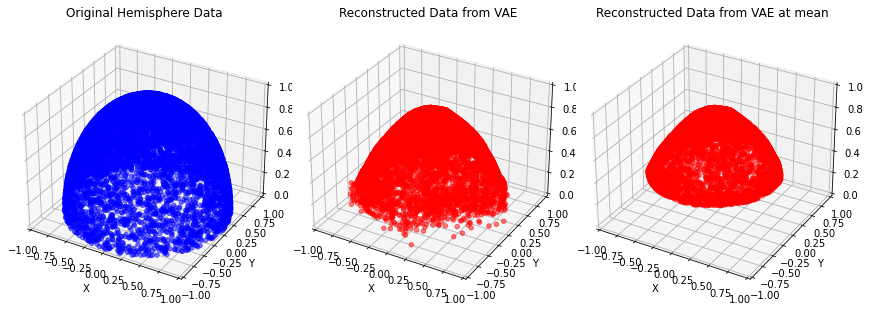

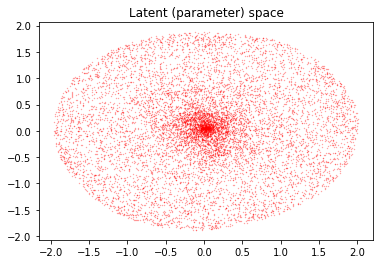

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))

# Plot original data
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(hemisphere_data[:, 0], hemisphere_data[:, 1], hemisphere_data[:, 2], c='b', marker='o', alpha=0.5)
ax1.set_title("Original Hemisphere Data")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.set_zlim([0, 1])

# Plot reconstructed data
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], reconstructed_data[:, 2], c='r', marker='o', alpha=0.5)
ax2.set_title("Reconstructed Data from VAE")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([0, 1])

# Plot reconstructed data
ax2 = fig.add_subplot(133, projection='3d')
ax2.scatter(reconstr_mean[:, 0], reconstr_mean[:, 1], reconstr_mean[:, 2], c='r', marker='o', alpha=0.5)
ax2.set_title("Reconstructed Data from VAE at mean")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([0, 1])

plt.tight_layout()
plt.show()

plt.scatter(latent_mu_data[:,0], latent_mu_data[:,1], c='r', marker='o', alpha=0.5, s=0.1)
plt.title("Latent (parameter) space")
plt.show()
